# SI 618 - Homework #1: Data Manipulation

Version 2023.09.06.01.CT (Fall 2023)

## Background

This homework assignment focuses on the analysis of biometric data and exercise performance.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class*, as well as those in the assigned readings and video resources.  You may need to consult pandas documentation, Stack Overflow, Copilot, or other online resources.  


A total of 100 points is available in this homework assignment, broken down as shown beside each question and in the accompanying rubric in Canvas.  Please note that to receive full points, code should conform to  [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines, and written responses should be grammatically correct, free of spelling errors, and generally follow the [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) guidelines.  You should review those guidelines before proceding with the assignment.

## Download the data from: 
https://www.kaggle.com/kukuroo3/body-performance-data


In [114]:
MY_UNIQNAME = 'prathuj'

## Answer the following questions.
Points for each question are shown below.

For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).  When we ask for an explanation of your answer, we are interested in your interpretation of the analyses that you produce.  With the exception of Question 1a, we are not interested in a description of the steps you took to arrive at your answer.

### <span style="color:magenta"> Q1: 8 pt(total):</span>
#### Q1a (3pt): Write out the steps you need to follow in order to describe the dataset, in terms of size, number of rows, and number of columns.



Replace this with your answer.  Remember that markdown supports bulleted lists:
* Import libraries `pandas`, `numpy`, etc.
* Load the Data `pd.read_csv`
* Size of the dataset `num_rows, num_columns = df.shape`
* Data types of columns `df.dtypes`
* Get summary statistics of numerical columns `df.describe`

#### Q1b (5pt): Write and execute the code that will do the steps you identified in Part (a) of this question.

In [115]:
# put your code here
import pandas as pd
body_df = pd.read_csv('bodyPerformance.csv')
print(body_df.head())
num_rows, num_columns = body_df.shape
shape = pd.Series([num_rows, num_columns], index=['num_rows', 'num_columns'])
print("Shape of the dataset:\n", shape)
print(body_df.dtypes)
print(body_df.describe())

    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  
Shape of the dataset:
 num_rows       13393
num_columns       12
dtype: int64
age                  

The above code is used to display the head of the data, size of the data set, variable types and description of data values.

### <span style="color:magenta">Q2: 5 pt:</span>
Without using pd.DataFrame.describe(), report the median age, height, and weight for people in the data. Round your answer to the nearest whole number.  Be sure to indicate units for each variable in your write-up.

In [116]:
# put your code here 
print("Median Age: ",body_df['age'].median().round(), "years")
print("Median Height: ",body_df['height_cm'].median().round(), "cm")
print("Median Weight: ",body_df['weight_kg'].median().round(), "kg")

Median Age:  32.0 years
Median Height:  169.0 cm
Median Weight:  67.0 kg


Computed the median using `.median()` method, then applied `.round()` function to round the value to nearest whole number.

### <span style="color:magenta">Q3: 5 pt: </span>
Look for any anomalous data points.  For example, are there cases where diastolic blood pressure is higher than systolic blood pressure (which is physiologically impossible)?  Do you notice any other anomalies?

In [117]:
body_df.columns.tolist()

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'class']

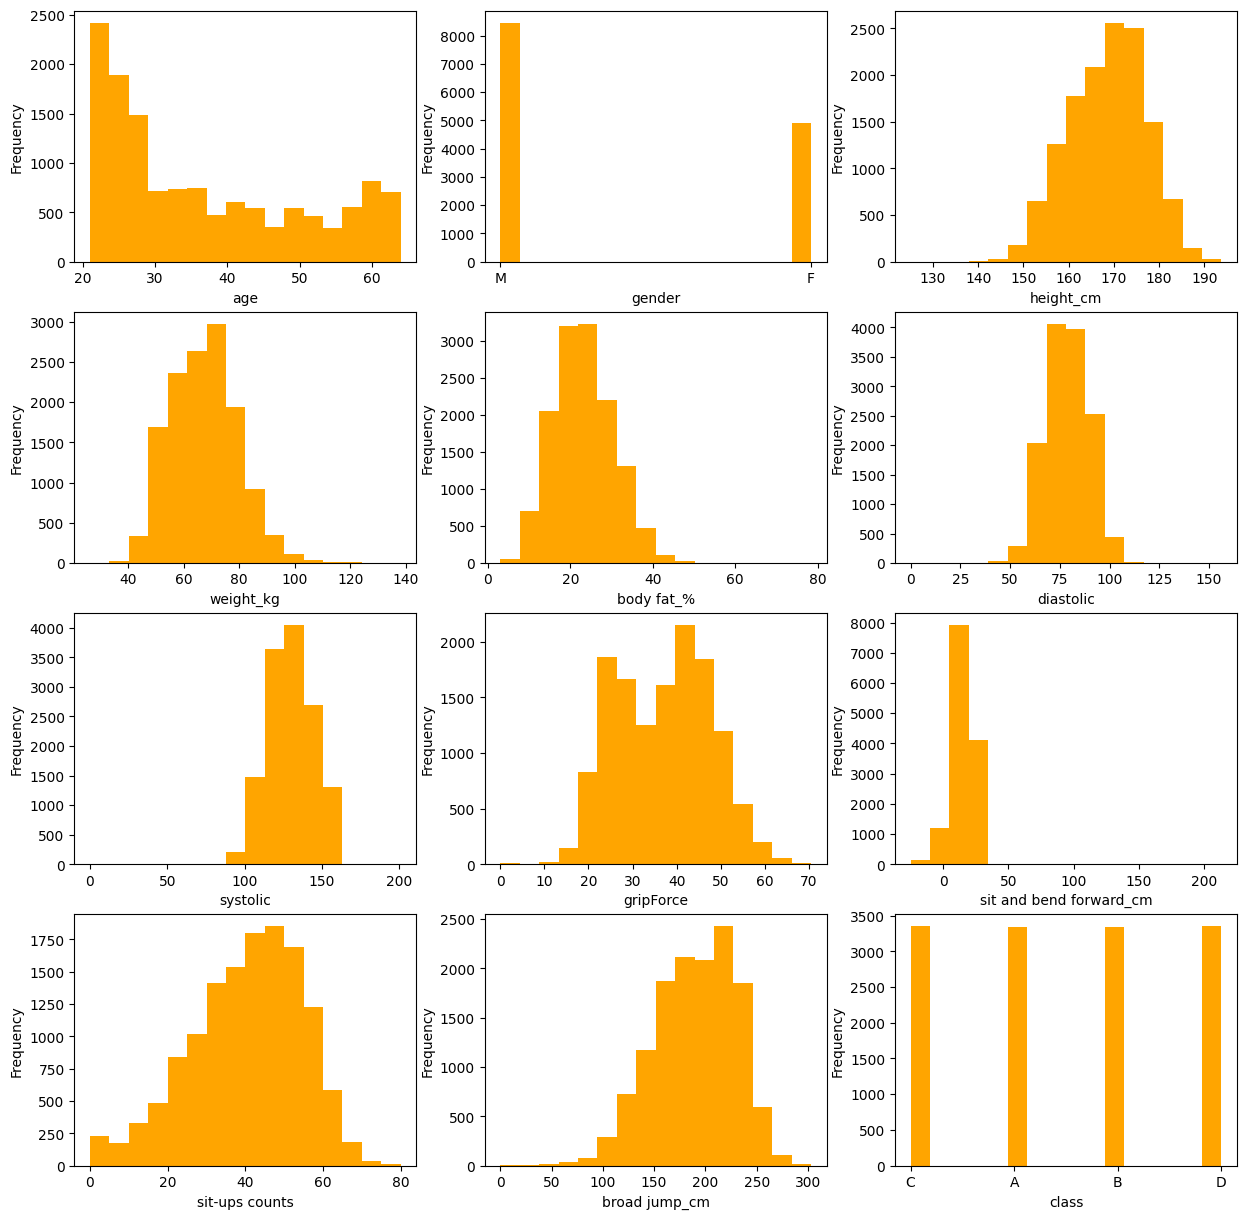

In [118]:
# plot graph of the variables
import matplotlib.pyplot as plt

flag_col = body_df.columns.tolist()
plt.figure(figsize=(15, 15))
for col in flag_col:
    plt.subplot(4, 3, flag_col.index(col)+1)
    plt.hist(body_df[col], bins=16, color='orange')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [119]:
# put your code here
# diastolic blood pressure > systolic blood pressure
print("Number of rows where diastolic blood pressure > systolic blood pressure: ", body_df[body_df['diastolic'] > body_df['systolic']].shape[0])

Number of rows where diastolic blood pressure > systolic blood pressure:  4


Anomalies are:
1. Diastolic Blood pressure > systolic blood pressure for 4 instances
1. Diastolic and systolic pressure being 0.0, which means that there is an error in recording the data
2. *sit and bend forward_cm* minimum value is -25.0
3. Some variables have 0 least count, which could mean that there is an error in data capture, eg. *gripForce*, *systolic*, *diastolic*, *broad jump_cm*

### <span style="color:magenta">Q4: 11 pt:</span>
Generate histogram plots for the age, weight, and height for that allow you to visualize differences between gender M and gender F participants. Describe the plots and point out any interesting aspects. You are not permitted to use Seaborn, Bokeh, or Plotly to create your visualizations (i.e. you can only use the matplotlib-pandas integrations).

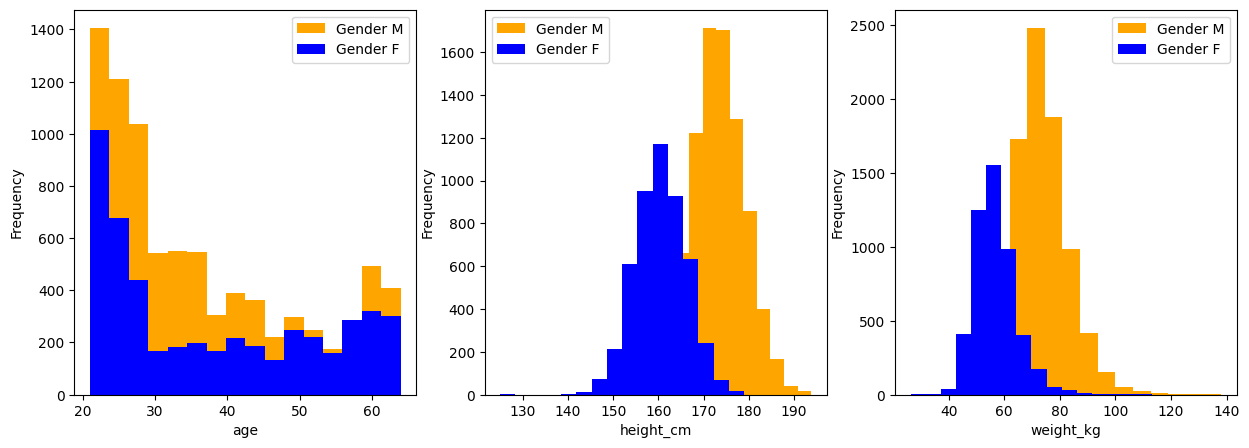

In [120]:
# put your code here
import matplotlib.pyplot as plt

body_df_M = body_df[(body_df.gender == 'M')]
body_df_F = body_df[(body_df.gender == 'F')]

flag_col = ['age', 'height_cm', 'weight_kg']
plt.figure(figsize=(15, 5))
for col in flag_col:
    plt.subplot(1, 3, flag_col.index(col)+1)
    plt.hist(body_df_M[col], bins=16, color='orange', label='Gender M')
    plt.xlabel(col )
    plt.ylabel('Frequency')
    plt.legend()

for col in flag_col:
    plt.subplot(1, 3, flag_col.index(col)+1)
    plt.hist(body_df_F[col], bins=16, color='blue', label='Gender F')
    plt.xlabel(col )
    plt.ylabel('Frequency')
    plt.legend()

In [121]:
# Make a series of Mean and Median values for each variable
columns = ['Mean Age', 'Mean Height', 'Mean Weight', 'Median Age', 'Median Height', 'Median Weight']
mean_median_M = pd.Series([body_df_M['age'].mean(), body_df_M['height_cm'].mean(), body_df_M['weight_kg'].mean(), body_df['age'].median(), body_df['height_cm'].median(), body_df['weight_kg'].median()], index=['Mean Age', 'Mean Height', 'Mean Weight', 'Median Age', 'Median Height', 'Median Weight'])
mena_median_F = pd.Series([body_df_F['age'].mean(), body_df_F['height_cm'].mean(), body_df_F['weight_kg'].mean(), body_df['age'].median(), body_df['height_cm'].median(), body_df['weight_kg'].median()], index=['Mean Age', 'Mean Height', 'Mean Weight', 'Median Age', 'Median Height', 'Median Weight'])

df = pd.DataFrame({'Measure': columns,'M_values': mean_median_M, 'F_values': mena_median_F})
df = df.round().reset_index().drop(columns=['index'])
print(df)  


         Measure  M_values  F_values
0       Mean Age      36.0      38.0
1    Mean Height     173.0     160.0
2    Mean Weight      74.0      57.0
3     Median Age      32.0      32.0
4  Median Height     169.0     169.0
5  Median Weight      67.0      67.0


1. The count of Males is higher than the count of Females for most age categories.
2. Males generally tend to have higher height and weight as compared to the Females indicating more muscle mass
3. Average Male tends to be 15 cms taller and 20 kgs heavier than an average Female.

### <span style="color:magenta">Q5: 16 pt:</span>
[Blood pressure](https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines) is reported as two numbers: diastolic (the lower number) and systolic (the higher number).  So, for example, if a person has a diastolic measurement of 80 and a systolic measurement of 120, the person's blood pressure would be reported as 120/80.

Blood pressure measurements fall into several categories:

Normal blood pressure. Your blood pressure is normal if it's below 120/80 mm Hg.

Elevated blood pressure. Elevated blood pressure is a systolic pressure ranging from 120 to 129 mm Hg and a diastolic pressure below (not above) 80 mm Hg. Elevated blood pressure may also be called prehypertension.

Stage 1 hypertension. Stage 1 hypertension is a systolic pressure ranging from 130 to 139 mm Hg or a diastolic pressure ranging from 80 to 89 mm Hg.

Stage 2 hypertension. More-severe hypertension, stage 2 hypertension is a systolic pressure of 140 mm Hg or higher or a diastolic pressure of 90 mm Hg or higher.

Hypertensive crisis. A blood pressure measurement higher than 180/120 mm Hg is an emergency situation that requires urgent medical care.

a) Report the number of people in each of those categories.


In [136]:
# insert your code here

body_df['bp_cat'] = 'Normal'
body_df.loc[(body_df['diastolic'] < 80) & (120 <= body_df['systolic']) & (body_df['systolic'] <= 129), 'bp_cat'] = 'Prehypertension'
body_df.loc[((80 <= body_df['diastolic']) & (body_df['diastolic'] <= 89)) | ((130 <= body_df['systolic']) & (body_df['systolic'] <= 139)), 'bp_cat'] = 'Stage 1 hypertension'
body_df.loc[((90 <= body_df['diastolic']) & (body_df['diastolic'] <= 120)) | ((140 <= body_df['systolic']) & (body_df['systolic'] <= 180)), 'bp_cat'] = 'Stage 2 hypertension'
body_df.loc[(120 < body_df['diastolic']) | (180 < body_df['systolic']), 'bp_cat'] = 'Hypertensive Crisis'

body_df['bp_cat'].value_counts()

bp_cat
Stage 2 hypertension    4404
Stage 1 hypertension    3987
Normal                  2898
Prehypertension         2090
Hypertensive Crisis       14
Name: count, dtype: int64

We compute the number of people in different categories based on their diastolic and systolic blood pressures. This shows that:
1. Most people in the data set fall in Stage 2 hypertension
2. Number of people in Hypertensive Crisis category are 16
3. About 20% of the people fall in Normal category

b) The guidelines were recently changed: prior to 2017, the guidelines set the threshold at 140/90 mm Hg for people younger than age 65 and 150/80 mm Hg for those ages 65 and older to be diagnosed with hypertension. Create and implement analyses that allow you to demonstrate how the change in guidelines affects the categorization of people into the different categories.
Make reasonable assumptions (and state them) about whether to use diastolic, systolic, both, or either of those measures when implementing your analysis.  Note that the new guidelines offer more categories than the older guidelines.

In [139]:
body_df['bp_cat_old'] = 'Normal'
body_df.loc[(body_df['age'] < 65) & ((140 <= body_df['systolic']) | (90 <= body_df['diastolic'])), 'bp_cat_old'] = 'Young Hypertension'
body_df.loc[(body_df['age'] >= 65) & ((180 <= body_df['systolic']) | (150 <= body_df['diastolic'])), 'bp_cat_old'] = 'Adult Hypertension'

body_df['bp_cat_old'].value_counts()


bp_cat_old
Normal                8975
Young Hypertension    4418
Name: count, dtype: int64

In this classification, we see that we have about 30% of the population as *Young Hypertension*. However there are no people who can be classified as *Adult Hypertension*. Here we have used a Logical Disjunction between *Systolic* and *Diastolic* blood pressures.

In [146]:
# body_df.loc[(body_df['age'] <= 65) & ((180 <= body_df['systolic']) | (150 <= body_df['diastolic']))].shape[0]
# >>> 14

### <span style="color:magenta">Q6: 10 pt:</span>
Create a new variable "age_class" that is "early" if age < 40, "middle" if age is between 40 and 60 (inclusive) and "late" if age > 60.  Report the mean and median number of sit-ups counts for each of those categories.


In [123]:
body_df[(body_df['age'] >= 40) & (60 >= body_df['age'])]['sit-ups counts'].median()

32.0

In [124]:
# put your code here
# new variable for age group
body_df['age_class'] = pd.cut(body_df['age'], bins=[-1, 39, 60, 100], labels=['early', 'middle', 'late'])

# mean and median sit-ups for each age group
print(body_df.groupby('age_class')['sit-ups counts'].agg(['mean', 'median']))

                mean  median
age_class                   
early      45.305217    47.0
middle     31.815141    32.0
late       24.060166    25.0


The Mean and Median sit-up count scores for the *age_class* categories fall in order: *late < middle < early*

### <span style="color:magenta">Q7: 15 pt: </span>
Calculate each person's Body Mass Index (BMI).  With the metric system, the formula for BMI is weight in kilograms divided by height in meters squared. Since height is commonly measured in centimeters, an alternate calculation formula, dividing the weight in kilograms by the height in centimeters squared, and then multiplying the result by 10,000, can be used. (https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html)

Create two histograms of BMI: one for gender F and one for gender M.  Describe similarites and differences of the two histograms.

In [125]:
# put your code here
# new variable for BMI
body_df_M['BMI'] = body_df_M['weight_kg'] / (body_df_M['height_cm']/100)**2
body_df_F['BMI'] = body_df_F['weight_kg'] / (body_df_F['height_cm']/100)**2

C:\Users\prathuj\AppData\Local\Temp\ipykernel_3740\3751405779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_df_M['BMI'] = body_df_M['weight_kg'] / (body_df_M['height_cm']/100)**2
C:\Users\prathuj\AppData\Local\Temp\ipykernel_3740\3751405779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_df_F['BMI'] = body_df_F['weight_kg'] / (body_df_F['height_cm']/100)**2


Text(0, 0.5, 'Frequency')

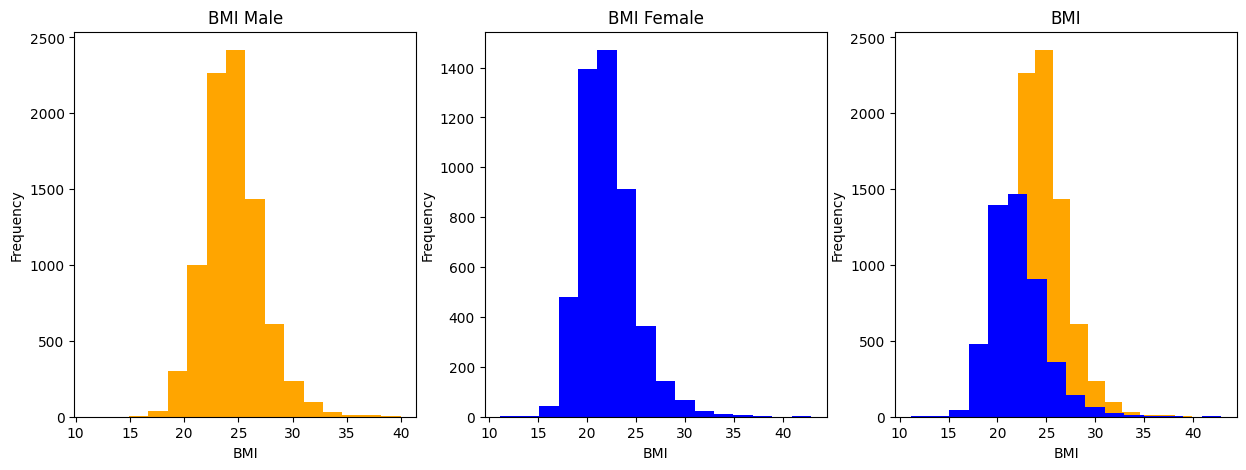

In [126]:
col = 'BMI'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(body_df_M[col], bins=16, color='orange')
plt.title(col + ' Male')
plt.xlabel(col )
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(body_df_F[col], bins=16, color='blue')
plt.title(col + ' Female')
plt.xlabel(col )
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(body_df_M[col], bins=16, color='orange')
plt.hist(body_df_F[col], bins=16, color='blue')
plt.title(col)
plt.xlabel(col )
plt.ylabel('Frequency')

In [127]:
# computing mean, std
print('Males:   Mean BMI:',body_df_M['BMI'].mean().round(8), '   Std. Dev.:',body_df_M['BMI'].std().round(8), '   Median:',body_df_M['BMI'].median().round(8))
print('Females: Mean BMI:',body_df_F['BMI'].mean().round(8), '    Std. Dev.:',body_df_F['BMI'].std().round(8), '   Median:',body_df_M['BMI'].median().round(8))

Males:   Mean BMI: 24.47973711    Std. Dev.: 2.63206413    Median: 24.28691942
Females: Mean BMI: 22.1042251     Std. Dev.: 2.83576841    Median: 24.28691942


The BMI of Males tend to be higher than the BMI of Females showing that men have a denser body mass as compared to females.

### <span style="color:magenta">Q8: 12 pt: </span>
Compare the mean values of height, weight, body fat %, grip force, sit and bend forward, and sit-ups count for gender F vs. gender M.  You should use both quantitative and visual methods in your work.


               Category  M_values  F_values Results
0                Height    173.26    160.49   M > F
1                Weight     73.58     56.91   M > F
2            Body Fat %     20.19     28.49   M < F
3            Grip Force     43.45     25.82   M > F
4  Sit and Bend Forward     13.10     18.84   M < F
5         Sit-ups Count     44.94     30.89   M > F


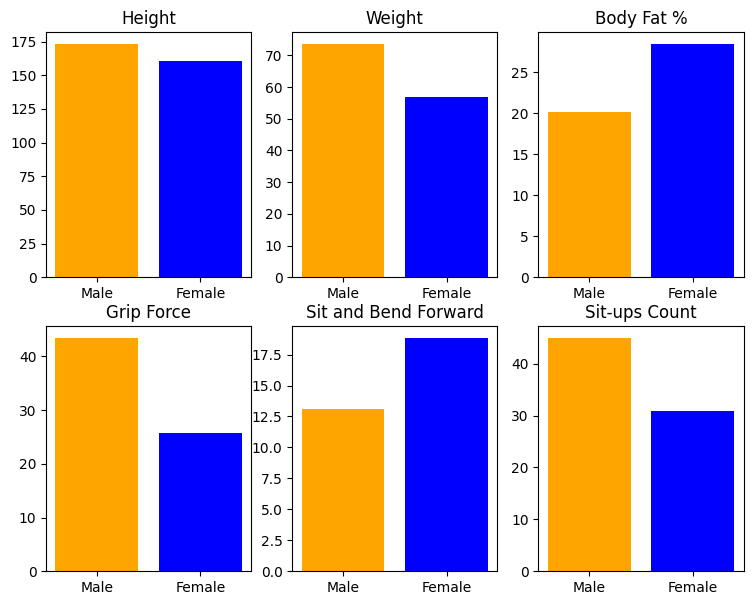

In [128]:
# put your code here
# Compare the mean values of height, weight, body fat %, grip force, 
# sit and bend forward, and sit-ups count for body_df_M vs. body_df_F.

cols = ['height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts']
titles = ['Height', 'Weight', 'Body Fat %', 'Grip Force', 'Sit and Bend Forward', 'Sit-ups Count']

col_M = ['mean_ht_M', 'mean_wt_M', 'mean_bf_M', 'mean_gf_M', 'mean_sbf_M', 'mean_sit_M']
col_F = ['mean_ht_F', 'mean_wt_F', 'mean_bf_F', 'mean_gf_F', 'mean_sbf_F', 'mean_sit_F']

M_values = pd.Series()
F_values = pd.Series()
Results = pd.Series()


for i in range(len(cols)):
    col_M[i] = body_df_M[cols[i]].mean()
    col_F[i] = body_df_F[cols[i]].mean()

    M_values = pd.concat([M_values, pd.Series([col_M[i].round(2)])])
    F_values = pd.concat([F_values, pd.Series([col_F[i].round(2)])])
    if col_M[i] > col_F[i]:
        Results = pd.concat([Results, pd.Series(['M > F'])])
    elif col_M[i] < col_F[i]:
        Results = pd.concat([Results, pd.Series(['M < F'])])
    else:
        Results = pd.concat([Results, pd.Series(['M = F'])])


df = pd.DataFrame({'Category': titles, 'M_values': M_values, 'F_values': F_values, 'Results': Results})
df = df.reset_index().drop(columns=['index'])
print(df)   

plt.figure(figsize=(9, 7))
for i in range(len(cols)):
    plt.subplot(2, 3, i+1)
    plt.bar(['Male', 'Female'], [col_M[i], col_F[i]], color=['orange', 'blue'])
    plt.title(titles[i])


1. Males have higher averages for: Height, Weight, Grip Force and Sit-ups count showing more strength component
2. Females have higher averages for: Body fat % and Sit and Bend Forward, showing more flexibility

### <span style="color:magenta">Q9: 18 pt: </span>
Take a look at gripForce (a measure of strength), "sit and bend forward" (a measure of flexibility), and "sit-ups count" (a measures of strength and endurance of the abdominals and hip-flexor muscles).  For each of those measures, calculate their z-scores (i.e. subtract the mean of the variable from each observation, then divide by the standard deviation of that score).  Create an overall fitness score by adding the z-scores for each of those variables together, then use `pd.qcut()` (not `pd.cut()`) to assign them to five categories ranging from lowest score to highest score.  

a) Report the number of individuals in each of the resulting categories.

b) Comment on the degree to which your categories correspond to the `class` column.

In [129]:
# put your code here

cols = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']
# calculate their z-scores (i.e. subtract the mean of the variable from each observation, then divide by the standard deviation of that score).
for col in cols:
    body_df[col + '_z'] = (body_df[col] - body_df[col].mean()) / body_df[col].std()

body_df[cols + [col + '_z' for col in cols]].head()

,gripForce,sit and bend forward_cm,sit-ups counts,gripForce_z,sit and bend forward_cm_z,sit-ups counts_z
0,54.9,18.4,60.0,1.688127,0.377303,1.416909
1,36.4,16.3,53.0,-0.053071,0.128979,0.926599
2,44.8,12.0,49.0,0.737527,-0.379495,0.646422
3,41.4,15.2,53.0,0.417523,-0.001096,0.926599
4,43.5,27.1,45.0,0.615172,1.406076,0.366245


In [130]:
# sum of z-scores for each row
body_df['Overall_Z_score'] = body_df[[col + '_z' for col in cols]].sum(axis=1)
body_df[cols + [col + '_z' for col in cols] + ['Overall_Z_score']].head()

,gripForce,sit and bend forward_cm,sit-ups counts,gripForce_z,sit and bend forward_cm_z,sit-ups counts_z,Overall_Z_score
0,54.9,18.4,60.0,1.688127,0.377303,1.416909,3.482339
1,36.4,16.3,53.0,-0.053071,0.128979,0.926599,1.002506
2,44.8,12.0,49.0,0.737527,-0.379495,0.646422,1.004454
3,41.4,15.2,53.0,0.417523,-0.001096,0.926599,1.343026
4,43.5,27.1,45.0,0.615172,1.406076,0.366245,2.387494


In [131]:
# use `pd.qcut()` to assign them to five categories ranging from lowest score to highest score. 
body_df['Overall_Z_score_cat'] = pd.qcut(body_df['Overall_Z_score'], 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
body_df['Overall_Z_score_cat'].value_counts()
# get class boundaries of each category as a Ovrall_Z_score

Overall_Z_score_cat
very low     2679
medium       2679
very high    2679
low          2678
high         2678
Name: count, dtype: int64

In [132]:
body_df[cols + [col + '_z' for col in cols] + ['Overall_Z_score','Overall_Z_score_cat']].sample(5)

,gripForce,sit and bend forward_cm,sit-ups counts,gripForce_z,sit and bend forward_cm_z,sit-ups counts_z,Overall_Z_score,Overall_Z_score_cat
6883,20.1,20.3,25.0,-1.587209,0.601978,-1.034639,-2.019870,very low
4996,25.1,14.9,56.0,-1.116615,-0.036571,1.136732,-0.016454,medium
12079,34.9,5.8,36.0,-0.194250,-1.112644,-0.264152,-1.571046,low
8747,19.3,18.5,19.0,-1.662504,0.389128,-1.454904,-2.728280,very low
856,46.6,19.6,56.0,0.906941,0.519203,1.136732,2.562875,very high


In [133]:
# groupby Overall_Z_score_cat, then age_class, then bp_cat, and count the number of rows in each group
body_df.groupby('Overall_Z_score_cat').apply(lambda x: x.groupby(['age_class']).size())

age_class,early,middle,late
Overall_Z_score_cat,,,
very low,935,1285,459
low,1372,1012,294
medium,1778,758,143
high,2005,612,61
very high,2363,309,7


In [134]:
body_df.groupby('Overall_Z_score_cat').apply(lambda x: x.groupby(['bp_cat']).size())

bp_cat,Hypertensive Crisis,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension
Overall_Z_score_cat,,,,,
very low,1,775,381,746,776
low,6,686,396,708,882
medium,2,606,450,805,816
high,4,491,423,845,915
very high,1,340,440,883,1015


1. *Overall_Z_score_cat* is higher for *early* age class than for *middle* than for *late*
1. People having higher *Overall_Z_score_cat* have higher count of *Prehypertension*, *Stage 1 hypertension* and *Stage 2 hypertension*


### IMPORTANT: Ensure your complete notebook runs without errors from top to bottom (check by using "Run All").

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas